## Lectura

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df_combined = pd.read_excel('data/combinado.xlsx', sheet_name='INFORMACIÓN GENERAL')

In [58]:
df_combined.columns

Index(['Unnamed: 0', 'CÓDIGO', 'ZONA', 'LUGAR DE MUESTREO', 'NOMBRE',
       'IDENTIFICACIÓN', 'LUGAR DE EXPEDICIÒN DEL DOCUMENTO ', 'TELÉFONO',
       'DIRECCIÓN', 'EDAD', 'SEXO M(1) F (2)', 'LUGAR DONDE RESIDE',
       'DEPARTAMENTO/MUNICIPIO', 'ESTRATO', 'AREA ',
       'HACE CUANTO TIEMPO VIVE EN ESE LUGAR',
       'CUANTAS PERSONAS COMPONEN SU HOGAR', 'GRUPO POBLACIONAL ',
       'TIPO DE USUARIO EN EL SGSSS', 'ESTADO CIVIL', 'ESCOLARIDAD',
       'LE HAN HECHO ENCUESTAS DE SISBEN ', 'EN QUE NIVEL LO CALIFICARON ',
       'DONDE VIVIA ANTERIORMENTE ', 'RAZONES POR LAS QUE SE MUDO ',
       'OFICIO ACTUAL', 'TIEMPO QUE LLEVA LABORANDO EN SU OFICIO ACTUAL',
       'OFICIOS DESEMPEÑADOS ANTERIORMENTE',
       'USTED O ALGÚN MIEMBRO DE SU FAMILIA REALIZA QUEMA DE AMALGAMA EN CASA',
       'USTED O ALGÚN MIEMBRO DE SU FAMILIA QUE VIVA CON USTED ALMACENA MERCURIO EN CASA',
       'A QUE DISTANCIA SE ENCUENTRA UBICADA SU CASA DE LA COMPRAVENTA DE ORO O EL SITIO DONDE SE QUEMA LA AMALGAMA

In [59]:
zona_cartagena = df_combined[df_combined['ZONA'] == 'CARTAGENA']
zona_san_martin = df_combined[df_combined['ZONA'] != 'CARTAGENA']

In [60]:
zona_san_martin['OFICIO ACTUAL'].unique()

array(['MINERÍA', 'AMA DE CASA', 'NO TIENE/NO TRABAJA', 'AGRICULTOR',
       'YA NO TRABAJA POR LA EDAD', 'EMPLEADA DOMESTICA ', 'ARTESANA ',
       'SUPERVISORA PAE', 'ESTUDIANTE', 'ENFERMERA AUXILIAR ',
       'CONDUCTOR ', 'CONSEJAL', 'TÉCNICO EN ELECTRÓNICA', 'PROFESOR',
       'ESTILISTAS ', 'GANADERÍA', 'COMERCIANTE', 'CAMPESINO',
       'MOTOTAXISTA', 'SURTIDOR DE AGUA - RECOLECTOR DE BASURA',
       'CASA DE FAMILIA', 'MOTOCARRO', 'VENDEDOR CARNE CERDO Y QUESO',
       'COMERCIANTE VERDURAS', 'PESCADOR', 'AGRICULTURA', 'SERVICIO',
       'INSEMINACIÓN ARTIFICIAL - VACUNA GANADO',
       'RECOGER BASURA Y BARRER', 'COMERCIANTE DE GANADERÍA',
       'COMERCIANTE DE MAÍZ Y PASTELES', 'AYUDANTE ALBAÑIL', 'MECÁNICO',
       'COSTURERA', 'VENDEDOR DE CHANCE', 'MODISTA', 'OFICIOS VARIOS'],
      dtype=object)

# Tablas y gráficas

/tmp/ipykernel_1156/909166777.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zona_san_martin['EDAD_RANGO'] = pd.cut(zona_san_martin['EDAD'], bins=bins, labels=labels, right=False)


col_0       count
EDAD_RANGO       
<31            49
31-40          49
41-50          40
51-60          51
60+            43


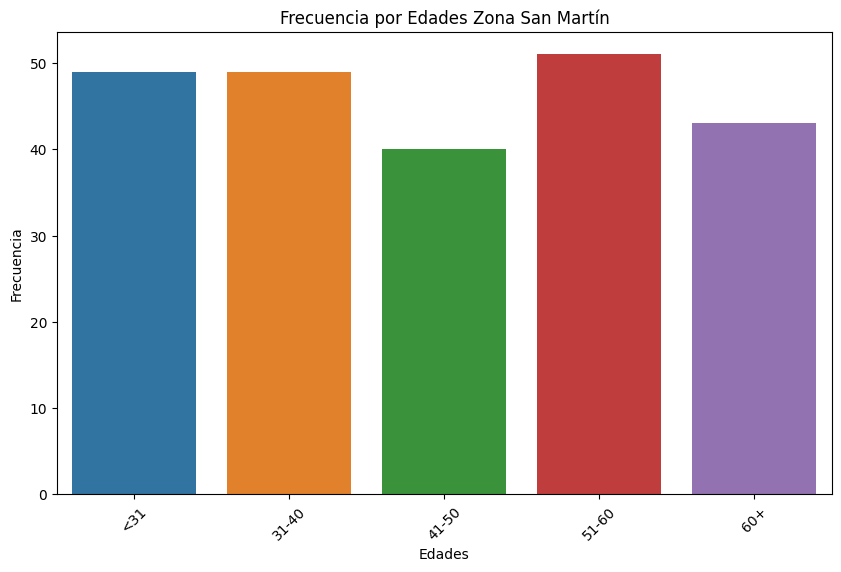

<Figure size 640x480 with 0 Axes>

In [61]:
# Supongamos que tu DataFrame se llama zona_san_martin

# 1. Tabla por edades y histograma
bins = [0, 30, 40, 50, 60, np.inf]
labels = ['<31', '31-40', '41-50', '51-60', '60+']
zona_san_martin['EDAD_RANGO'] = pd.cut(zona_san_martin['EDAD'], bins=bins, labels=labels, right=False)

tabla_edades = pd.crosstab(index=zona_san_martin['EDAD_RANGO'], columns='count')
print(tabla_edades)

# Graficar la tabla de frecuencias por edades
plt.figure(figsize=(10, 6))
sns.barplot(x=tabla_edades.index, y='count', data=tabla_edades.reset_index())
plt.title('Frecuencia por Edades Zona San Martín')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')

# Rotar las etiquetas del eje x para mejorar legibilidad
plt.xticks(rotation=45)
plt.show()
plt.savefig('views/sm/frecuencia_por_edades.jpg', dpi=300)

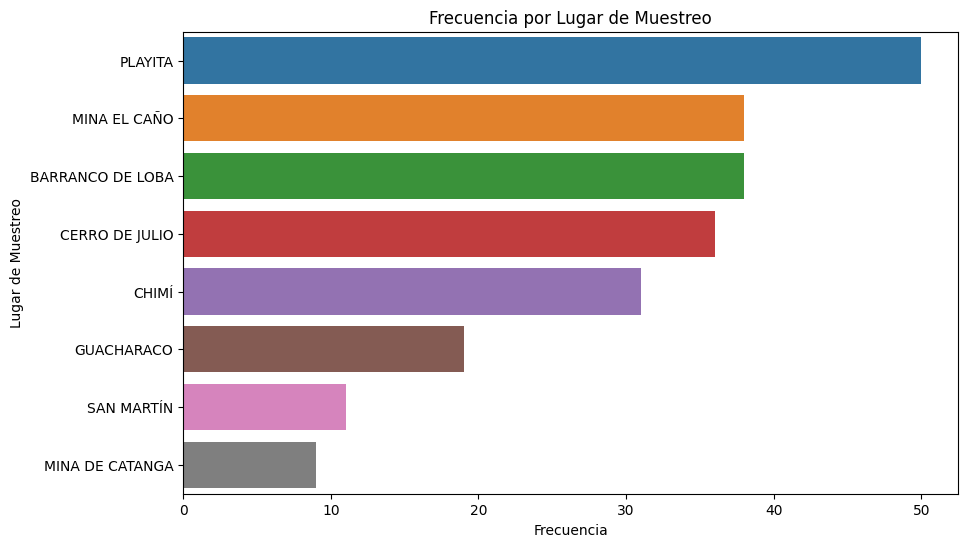

In [62]:
# Crear la tabla de frecuencias por lugar de muestreo
tabla_lugar_muestreo = zona_san_martin['LUGAR DE MUESTREO'].value_counts().reset_index()
tabla_lugar_muestreo.columns = ['Lugar de Muestreo', 'Frecuencia']

# Graficar el diagrama de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Frecuencia', y='Lugar de Muestreo', data=tabla_lugar_muestreo)
plt.title('Frecuencia por Lugar de Muestreo')
plt.xlabel('Frecuencia')
plt.ylabel('Lugar de Muestreo')
plt.show()

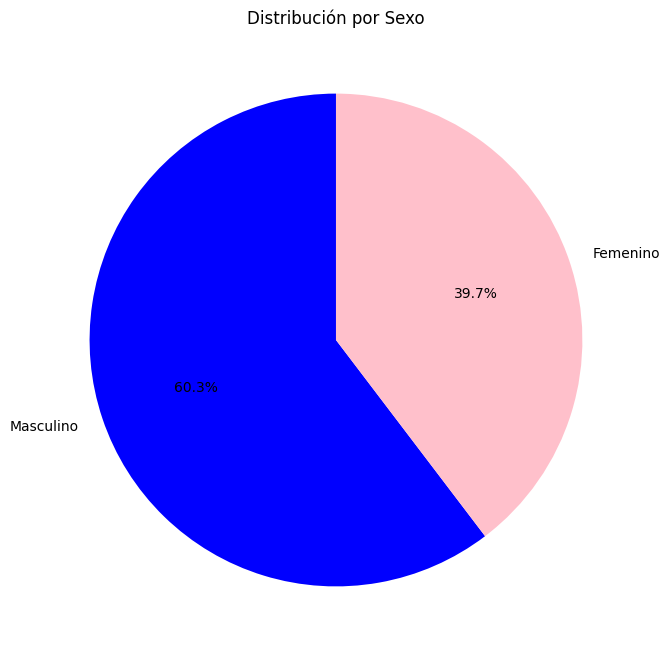

In [63]:
# Crear la tabla de frecuencias por sexo
tabla_sexo = zona_san_martin['SEXO M(1) F (2)'].value_counts().reset_index()
tabla_sexo.columns = ['Sexo', 'Frecuencia']

# Graficar el diagrama de pastel
plt.figure(figsize=(8, 8))
plt.pie(tabla_sexo['Frecuencia'], labels=['Masculino', 'Femenino'], autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'])
plt.title('Distribución por Sexo')
plt.show()


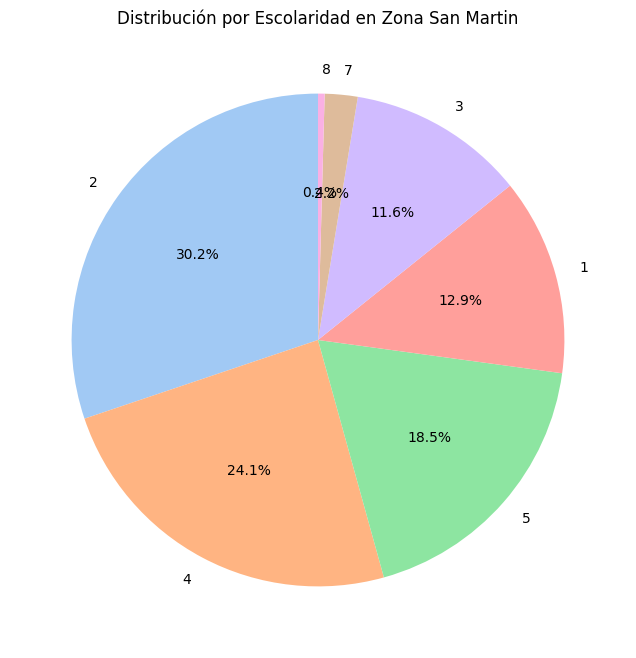

In [64]:
# Crear tabla de frecuencias por escolaridad
tabla_escolaridad = zona_san_martin['ESCOLARIDAD'].value_counts().reset_index()
tabla_escolaridad.columns = ['Escolaridad', 'Frecuencia']

# Gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(tabla_escolaridad['Frecuencia'], labels=tabla_escolaridad['Escolaridad'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribución por Escolaridad en Zona San Martin')
plt.show()

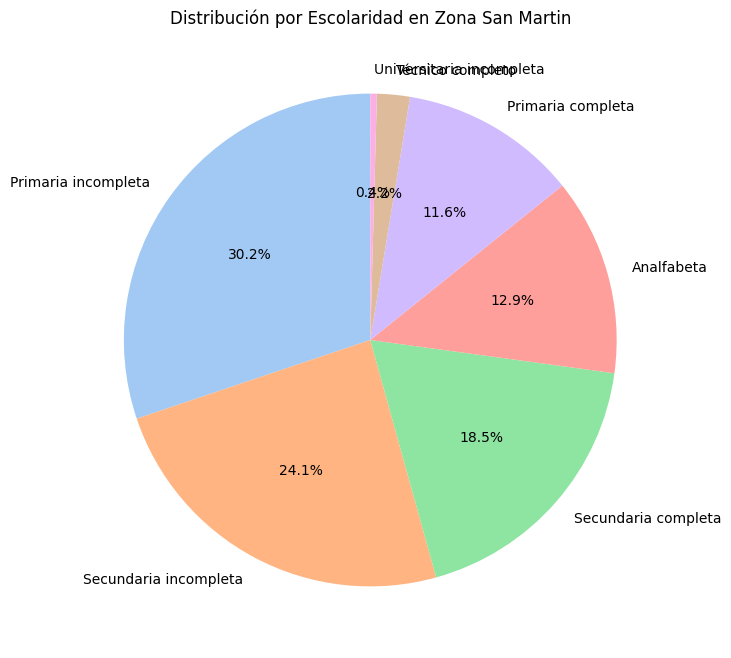

In [66]:
# Mapeo de números a etiquetas
mapeo_escolaridad = {
    1: 'Analfabeta',
    2: 'Primaria incompleta',
    3: 'Primaria completa',
    4: 'Secundaria incompleta',
    5: 'Secundaria completa',
    6: 'Técnico incompleto',
    7: 'Técnico completo',
    8: 'Universitaria incompleta',
    9: 'Universitaria completa',
    10: 'Otro'
}

# Crear una copia de la columna 'ESCOLARIDAD'
zona_san_martin_copia = zona_san_martin.copy()
zona_san_martin_copia['ESCOLARIDAD'] = zona_san_martin_copia['ESCOLARIDAD'].map(mapeo_escolaridad)

# Crear tabla de frecuencias por escolaridad
tabla_escolaridad = zona_san_martin_copia['ESCOLARIDAD'].value_counts().reset_index()
tabla_escolaridad.columns = ['Escolaridad', 'Frecuencia']

# Gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(tabla_escolaridad['Frecuencia'], labels=tabla_escolaridad['Escolaridad'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribución por Escolaridad en Zona San Martin')
plt.show()

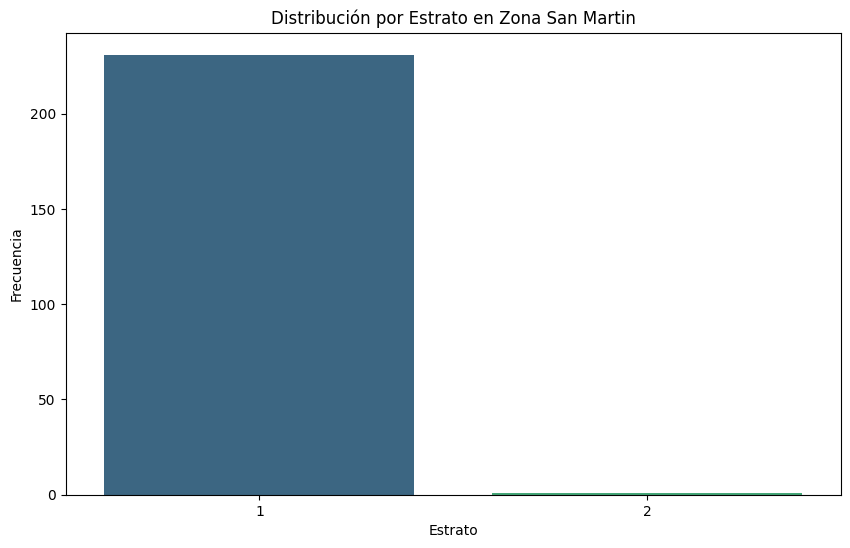

In [67]:
# Crear tabla de frecuencias por estrato
tabla_estrato = zona_san_martin['ESTRATO'].value_counts().reset_index()
tabla_estrato.columns = ['Estrato', 'Frecuencia']

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Estrato', y='Frecuencia', data=tabla_estrato, palette='viridis')
plt.title('Distribución por Estrato en Zona San Martin')
plt.xlabel('Estrato')
plt.ylabel('Frecuencia')
plt.show()

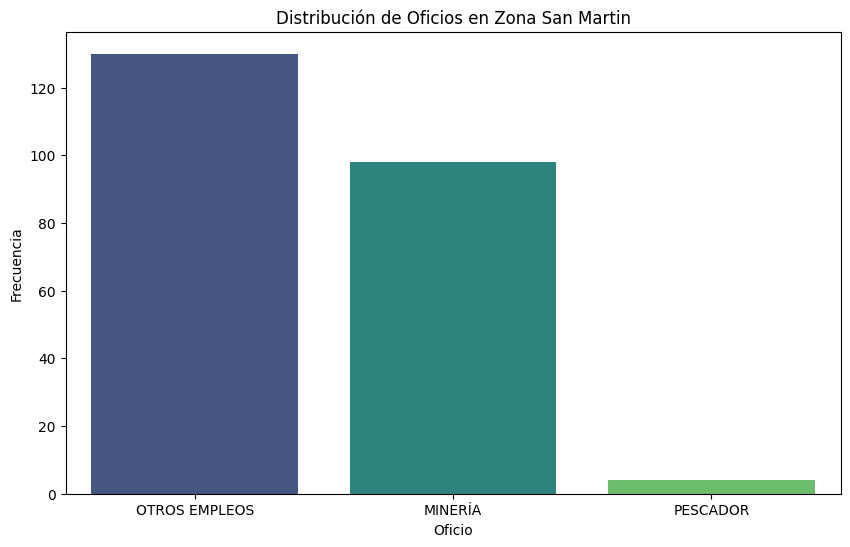

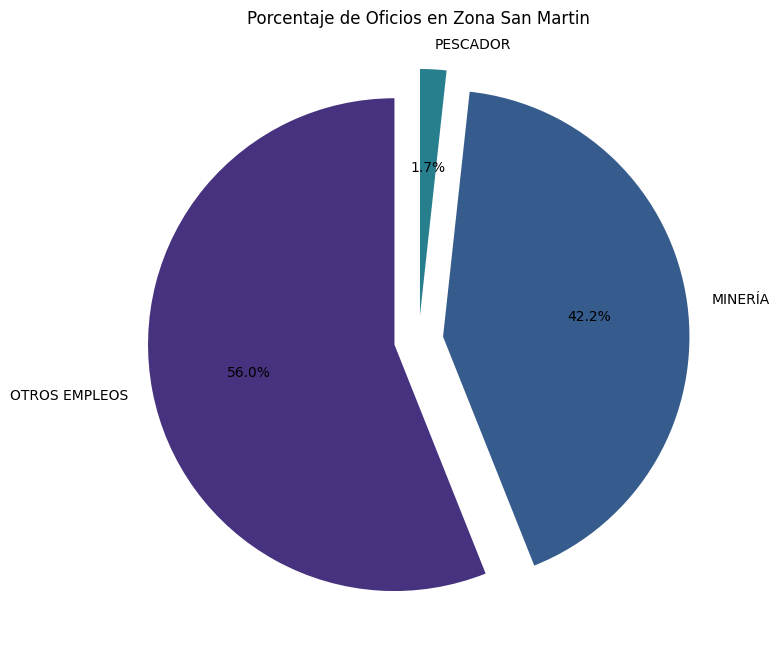

,Oficio,Frecuencia,Porcentaje
0,OTROS EMPLEOS,130,56.034483
1,MINERÍA,98,42.241379
2,PESCADOR,4,1.724138


In [68]:
# Crear una copia de la columna 'OFICIO ACTUAL'
oficios_copia = zona_san_martin['OFICIO ACTUAL'].copy()

# Mapeo de oficios
mapeo_oficios = {
    'MINERÍA': 'MINERÍA',
    'PESCADOR': 'PESCADOR'
}

# Remapear la columna 'OFICIO ACTUAL'
oficios_copia = oficios_copia.map(mapeo_oficios).fillna('OTROS EMPLEOS')

# Crear tabla de frecuencias por oficio
tabla_oficios = oficios_copia.value_counts().reset_index()
tabla_oficios.columns = ['Oficio', 'Frecuencia']

# Calcular porcentaje
tabla_oficios['Porcentaje'] = (tabla_oficios['Frecuencia'] / tabla_oficios['Frecuencia'].sum()) * 100

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Oficio', y='Frecuencia', data=tabla_oficios, palette='viridis')
plt.title('Distribución de Oficios en Zona San Martin')
plt.xlabel('Oficio')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(tabla_oficios['Frecuencia'], labels=tabla_oficios['Oficio'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'), explode=(0.1, 0.1, 0.1))
plt.title('Porcentaje de Oficios en Zona San Martin')
plt.show()

# Mostrar tabla
tabla_oficios

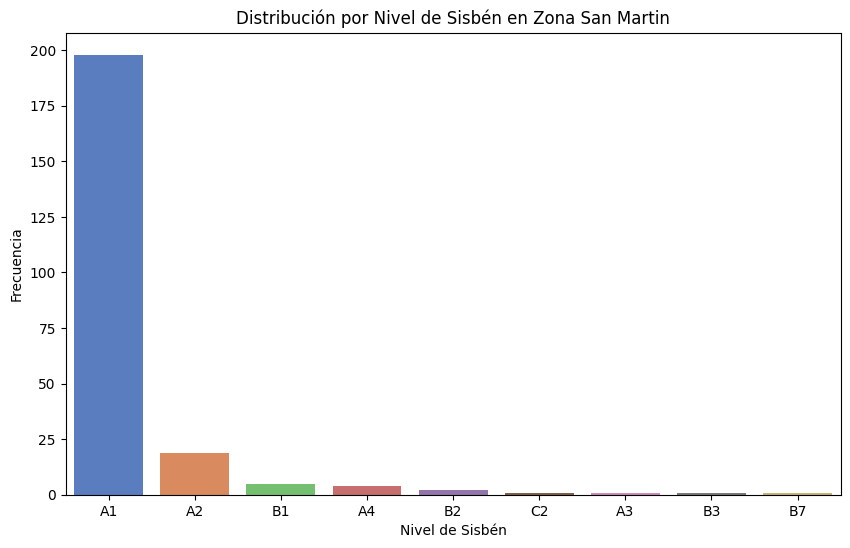

,Nivel de Sisbén,Frecuencia
0,A1,198
1,A2,19
2,B1,5
3,A4,4
4,B2,2
5,C2,1
6,A3,1
7,B3,1
8,B7,1


In [69]:
# Crear tabla de frecuencias por nivel de Sisbén
tabla_sisben = zona_san_martin['EN QUE NIVEL LO CALIFICARON '].value_counts().reset_index()
tabla_sisben.columns = ['Nivel de Sisbén', 'Frecuencia']

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Nivel de Sisbén', y='Frecuencia', data=tabla_sisben, palette='muted')
plt.title('Distribución por Nivel de Sisbén en Zona San Martin')
plt.xlabel('Nivel de Sisbén')
plt.ylabel('Frecuencia')
plt.show()

# Mostrar tabla
tabla_sisben

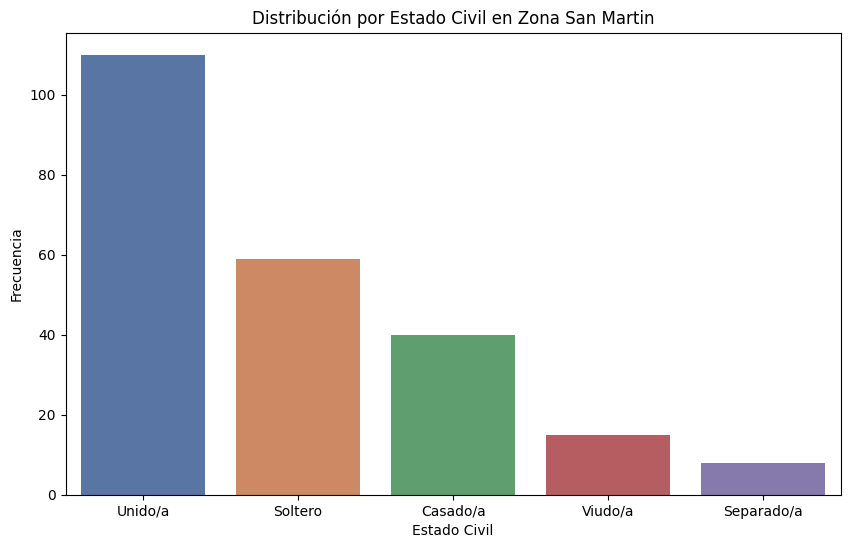

,Estado Civil,Frecuencia
0,Unido/a,110
1,Soltero,59
2,Casado/a,40
3,Viudo/a,15
4,Separado/a,8


In [71]:
# PUNTO 8

# Crear tabla de frecuencias por estado civil
tabla_estado_civil = zona_san_martin['ESTADO CIVIL'].value_counts().reset_index()
tabla_estado_civil.columns = ['Estado Civil', 'Frecuencia']

# Mapear los números a sus respectivas etiquetas
mapeo_estado_civil = {
    1: 'Casado/a',
    2: 'Unido/a',
    3: 'Separado/a',
    4: 'Viudo/a',
    5: 'Soltero'
}

# Remapear la columna 'ESTADO CIVIL'
tabla_estado_civil['Estado Civil'] = tabla_estado_civil['Estado Civil'].map(mapeo_estado_civil)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Estado Civil', y='Frecuencia', data=tabla_estado_civil, palette='deep')
plt.title('Distribución por Estado Civil en Zona San Martin')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.show()

# Mostrar tabla
tabla_estado_civil

/tmp/ipykernel_1156/2112196361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zona_san_martin['GRUPO POBLACIONAL '] = zona_san_martin['GRUPO POBLACIONAL '].replace(mapeo_grupo_poblacional)


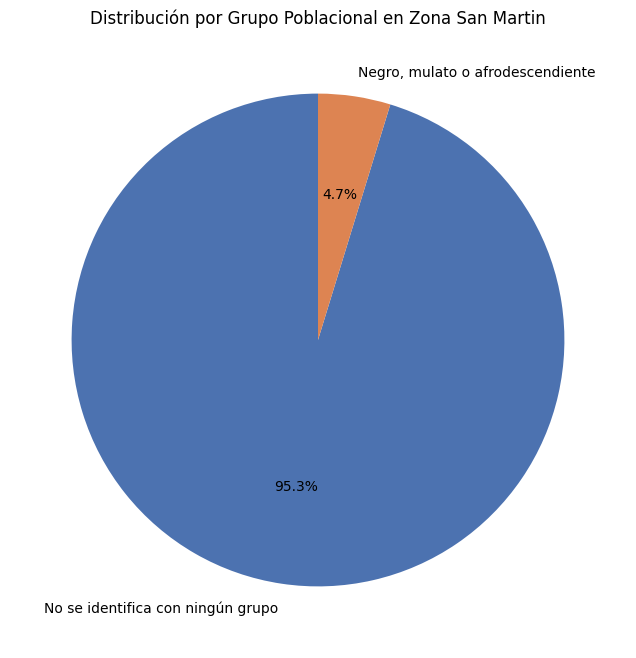

,Grupo Poblacional,Frecuencia
0,No se identifica con ningún grupo,221
1,"Negro, mulato o afrodescendiente",11


In [74]:
# PUNTO 9

# Reemplazar los códigos por sus respectivas etiquetas en la columna 'GRUPO POBLACIONAL'
mapeo_grupo_poblacional = {
    5: "Negro, mulato o afrodescendiente",
    6: "No se identifica con ningún grupo"
}

zona_san_martin['GRUPO POBLACIONAL '] = zona_san_martin['GRUPO POBLACIONAL '].replace(mapeo_grupo_poblacional)

# Crear tabla de frecuencias por grupo poblacional
tabla_grupo_poblacional = zona_san_martin['GRUPO POBLACIONAL '].value_counts().reset_index()
tabla_grupo_poblacional.columns = ['Grupo Poblacional', 'Frecuencia']

# Gráfico de pastel
plt.figure(figsize=(10, 8))
plt.pie(tabla_grupo_poblacional['Frecuencia'], labels=tabla_grupo_poblacional['Grupo Poblacional'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('deep'))
plt.title('Distribución por Grupo Poblacional en Zona San Martin')
plt.show()

# Mostrar tabla
tabla_grupo_poblacional

/tmp/ipykernel_1156/3827590221.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zona_san_martin['TIEMPO EN EL OFICIO CATEGORIA'] = pd.cut(zona_san_martin['TIEMPO QUE LLEVA LABORANDO EN SU OFICIO ACTUAL'], bins=bins, labels=labels)


  Tiempo en el Oficio  Frecuencia
0               16-30         129
1                1-15          66
2               31-45          17
3               46-60           8
4                 60+           3


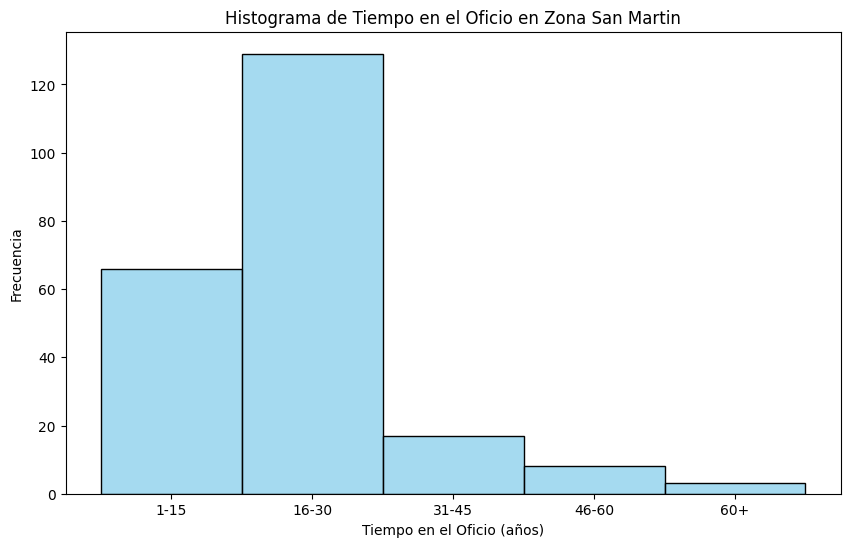

In [77]:
# PUNTO 10

# Crear tabla de frecuencias por tiempo en el oficio
bins = [1, 15, 30, 45, 60, float('inf')]
labels = ['1-15', '16-30', '31-45', '46-60', '60+']

zona_san_martin['TIEMPO EN EL OFICIO CATEGORIA'] = pd.cut(zona_san_martin['TIEMPO QUE LLEVA LABORANDO EN SU OFICIO ACTUAL'], bins=bins, labels=labels)

tabla_tiempo_oficio = zona_san_martin['TIEMPO EN EL OFICIO CATEGORIA'].value_counts().reset_index()
tabla_tiempo_oficio.columns = ['Tiempo en el Oficio', 'Frecuencia']

# Mostrar la tabla
print(tabla_tiempo_oficio)


# Crear histograma de frecuencias para el tiempo en el oficio
plt.figure(figsize=(10, 6))
sns.histplot(zona_san_martin['TIEMPO EN EL OFICIO CATEGORIA'], bins=bins, kde=False, color='skyblue')
plt.title('Histograma de Tiempo en el Oficio en Zona San Martin')
plt.xlabel('Tiempo en el Oficio (años)')
plt.ylabel('Frecuencia')
plt.show()

/tmp/ipykernel_1156/3384291357.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zona_san_martin['AREA '] = zona_san_martin['AREA '].map(mapeo_areas)


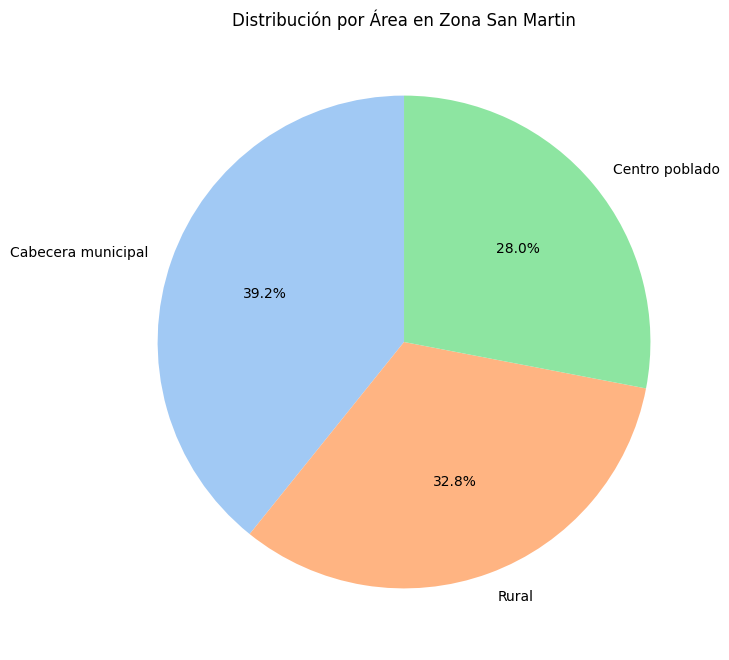

                 Área  Frecuencia
0  Cabecera municipal          91
1               Rural          76
2      Centro poblado          65


In [79]:
# Mapeo de áreas
mapeo_areas = {
    1: "Cabecera municipal",
    2: "Rural",
    3: "Centro poblado"
}

# Remapear la columna 'AREA'
zona_san_martin['AREA '] = zona_san_martin['AREA '].map(mapeo_areas)

# Crear tabla de frecuencias por área
tabla_area = zona_san_martin['AREA '].value_counts().reset_index()
tabla_area.columns = ['Área', 'Frecuencia']

# Reemplazar '0' por 'No especifica'
tabla_area['Área'] = tabla_area['Área'].replace({0: 'No especifica'})

# Gráfico de pastel
plt.figure(figsize=(10, 8))
plt.pie(tabla_area['Frecuencia'], labels=tabla_area['Área'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribución por Área en Zona San Martin')
plt.show()

# Mostrar la tabla
print(tabla_area)

/tmp/ipykernel_1156/1477092994.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zona_san_martin['Rango de Tiempo en el Lugar'] = pd.cut(zona_san_martin['HACE CUANTO TIEMPO VIVE EN ESE LUGAR'], bins=limites_rangos, labels=['0-15', '16-30', '31-45', '46-60', 'Más de 60'])


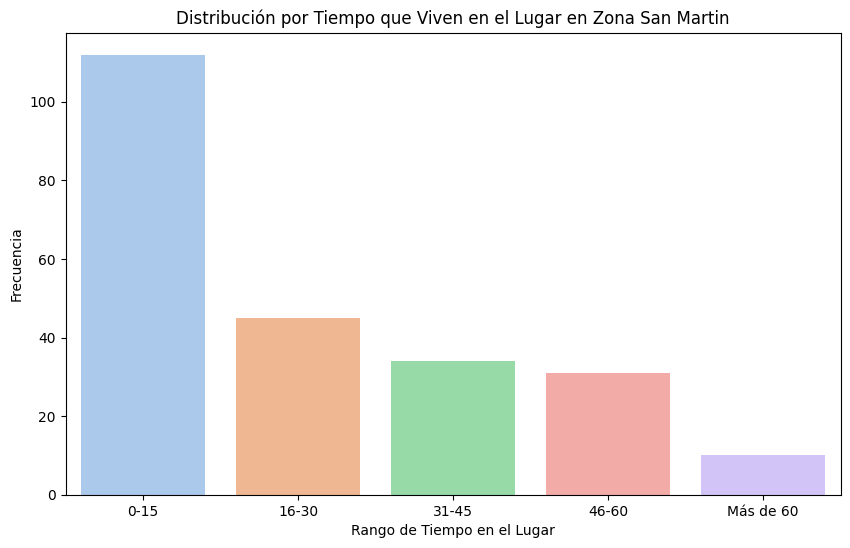

/home/robertbarac/miniconda3/envs/mlflow-env/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6827: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


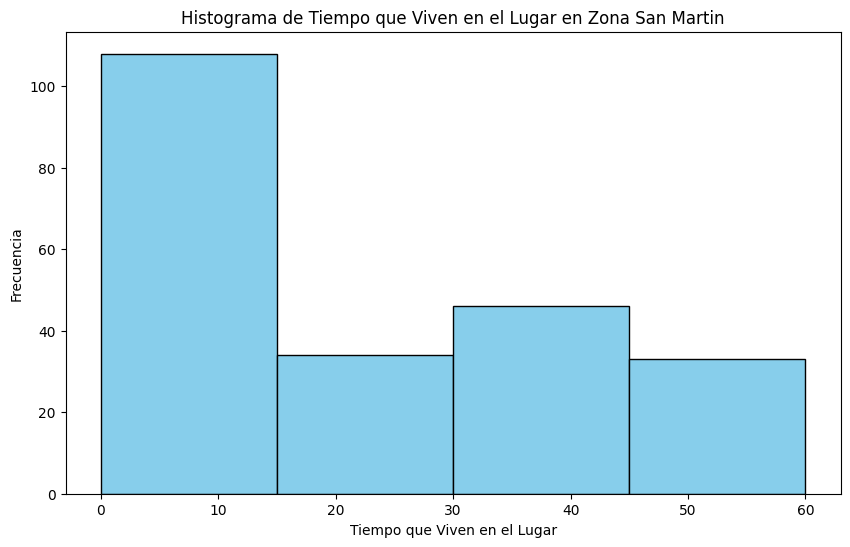

In [80]:
# PUNTO 12
# Definir los límites de los rangos
limites_rangos = [0, 15, 30, 45, 60, float('inf')]

# Mapear la columna 'HACE CUANTO TIEMPO VIVE EN ESE LUGAR' a los rangos
zona_san_martin['Rango de Tiempo en el Lugar'] = pd.cut(zona_san_martin['HACE CUANTO TIEMPO VIVE EN ESE LUGAR'], bins=limites_rangos, labels=['0-15', '16-30', '31-45', '46-60', 'Más de 60'])

# Crear tabla de frecuencias por rango de tiempo
tabla_tiempo_lugar = zona_san_martin['Rango de Tiempo en el Lugar'].value_counts().reset_index()
tabla_tiempo_lugar.columns = ['Rango de Tiempo en el Lugar', 'Frecuencia']

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Rango de Tiempo en el Lugar', y='Frecuencia', data=tabla_tiempo_lugar, palette='pastel')
plt.title('Distribución por Tiempo que Viven en el Lugar en Zona San Martin')
plt.xlabel('Rango de Tiempo en el Lugar')
plt.ylabel('Frecuencia')
plt.show()

# Histograma
plt.figure(figsize=(10, 6))
plt.hist(zona_san_martin['HACE CUANTO TIEMPO VIVE EN ESE LUGAR'], bins=limites_rangos, color='skyblue', edgecolor='black')
plt.title('Histograma de Tiempo que Viven en el Lugar en Zona San Martin')
plt.xlabel('Tiempo que Viven en el Lugar')
plt.ylabel('Frecuencia')
plt.show()

## De aquí en adelante lo que hay que borrar no sin antes copiar ciertas cositas.

In [4]:
# Consulta 1: Tabla de profesiones con porcentaje
tabla_profesiones = df_SM_full['OFICIO ACTUAL'].value_counts(normalize=True) * 100
tabla_profesiones

OFICIO ACTUAL
MINERÍA                                    33.333333
AMA DE CASA                                25.000000
No sabe/No responde                         7.894737
ESTUDIANTE                                  6.140351
AGRICULTOR                                  6.140351
NO TIENE/NO TRABAJA                         3.070175
COMERCIANTE                                 1.315789
MOTOTAXISTA                                 1.315789
COSTURERA                                   0.877193
YA NO TRABAJA POR LA EDAD                   0.877193
VENDEDOR PESCADO                            0.877193
MOTOCARRO                                   0.877193
PESCADOR                                    0.877193
SUPERVISORA PAE                             0.438596
COMERCIANTE VERDURAS                        0.438596
VENDEDOR DE CHANCE                          0.438596
MECÁNICO                                    0.438596
AYUDANTE ALBAÑIL                            0.438596
COMERCIANTE DE MAÍZ Y PASTELES  

In [5]:
# Consulta 2: Tabla de frecuencias con edades
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
tabla_edades = pd.cut(df_SM_full['EDAD'], bins=bins, include_lowest=True, right=False).value_counts(sort=False)
tabla_edades

EDAD
[0, 10)       1
[10, 20)     23
[20, 30)     22
[30, 40)     40
[40, 50)     38
[50, 60)     64
[60, 70)     19
[70, 80)     16
[80, 90)      5
[90, 100)     0
Name: count, dtype: int64

In [6]:
# Consulta 3: Tabla de porcentaje de sexo (M=1, F=2)
tabla_sexo = df_SM_full['SEXO M(1) F (2)'].value_counts(normalize=True) * 100
tabla_sexo

SEXO M(1) F (2)
1.0    61.842105
2.0    38.157895
Name: proportion, dtype: float64

In [7]:
# Consulta 4: Tabla de porcentajes de 'TIPO DE USUARIO EN EL SGSSS'
tabla_tipo_usuario = df_SM_full['TIPO DE USUARIO EN EL SGSSS'].value_counts(normalize=True) * 100
tabla_tipo_usuario

TIPO DE USUARIO EN EL SGSSS
2.0    97.807018
1.0     1.315789
3.0     0.877193
Name: proportion, dtype: float64

In [8]:
# Consulta 5: Tabla de frecuencias de años que llevan los de 'MINERÍA' en su oficio
mask_mineria = df_SM_full['OFICIO ACTUAL'].str.contains(r'^(MINER|MINERÍA)', case=False, na=False)
tabla_anios_mineria = df_SM_full.loc[mask_mineria, 'TIEMPO QUE LLEVA LABORANDO EN SU OFICIO ACTUAL'].value_counts()
tabla_anios_mineria

/tmp/ipykernel_7229/1532110656.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask_mineria = df_SM_full['OFICIO ACTUAL'].str.contains(r'^(MINER|MINERÍA)', case=False, na=False)


TIEMPO QUE LLEVA LABORANDO EN SU OFICIO ACTUAL
20.00    9
30.00    6
2.00     6
10.00    5
15.00    5
35.00    4
1.00     4
3.00     4
25.00    4
8.00     3
18.50    3
12.00    2
18.00    2
23.00    2
4.00     2
5.00     2
37.00    1
19.00    1
40.00    1
27.00    1
16.00    1
7.00     1
13.00    1
17.00    1
42.00    1
50.00    1
0.25     1
21.00    1
6.00     1
Name: count, dtype: int64

In [9]:
# Consulta adicional: Tabla de porcentajes referente al nivel de Sisben
tabla_sisben = df_SM_full['EN QUE NIVEL LO CALIFICARON '].value_counts(normalize=True) * 100
tabla_sisben

EN QUE NIVEL LO CALIFICARON 
A1    88.157895
A2     6.140351
B1     1.754386
A4     1.315789
B2     0.877193
A      0.877193
C2     0.438596
A3     0.438596
Name: proportion, dtype: float64

## Guardar consultas en HTML

In [12]:
# Guardar tablas en HTML
tabla_profesiones.to_frame().to_html('queries/tabla_profesiones.html')
tabla_edades.to_frame().to_html('queries/tabla_edades.html')
tabla_sexo.to_frame().to_html('queries/tabla_sexo.html')
tabla_tipo_usuario.to_frame().to_html('queries/tabla_tipo_usuario.html')
tabla_anios_mineria.to_frame().to_html('queries/tabla_anios_mineria.html')
tabla_sisben.to_frame().to_html('queries/tabla_sisben.html')

## Gráficos

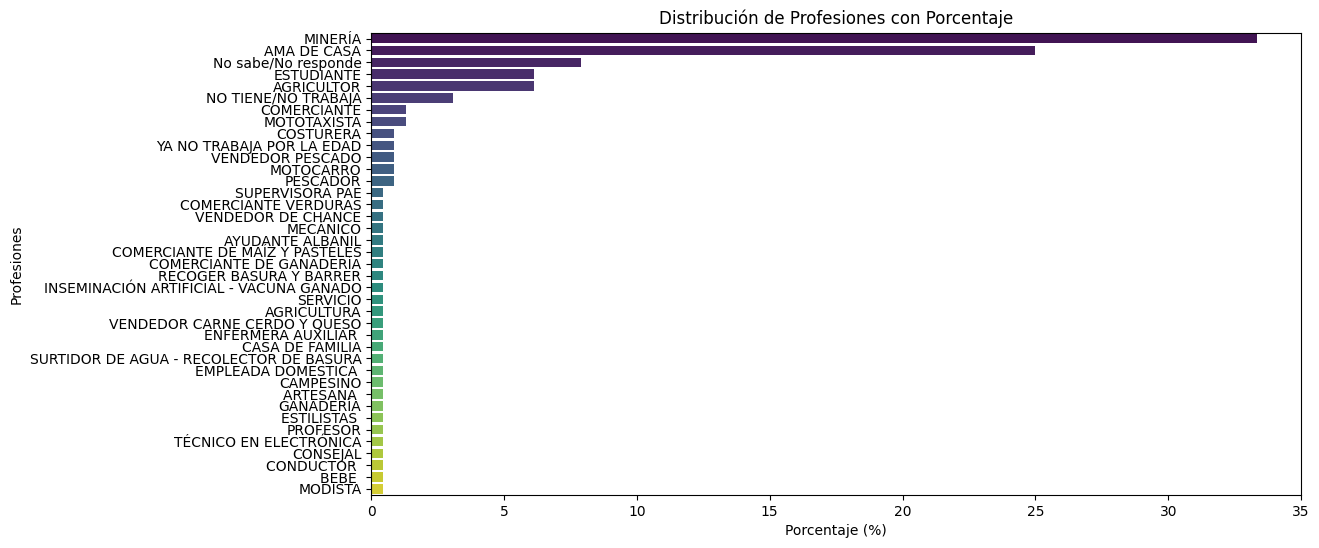

In [13]:
# Visualizaciones
# Gráfico 1: Barplot de profesiones con porcentaje
plt.figure(figsize=(12, 6))
sns.barplot(x=tabla_profesiones.values, y=tabla_profesiones.index, palette='viridis')
plt.title('Distribución de Profesiones con Porcentaje')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Profesiones')
plt.savefig('views/viz_profesiones.jpg', dpi=300)
plt.show()

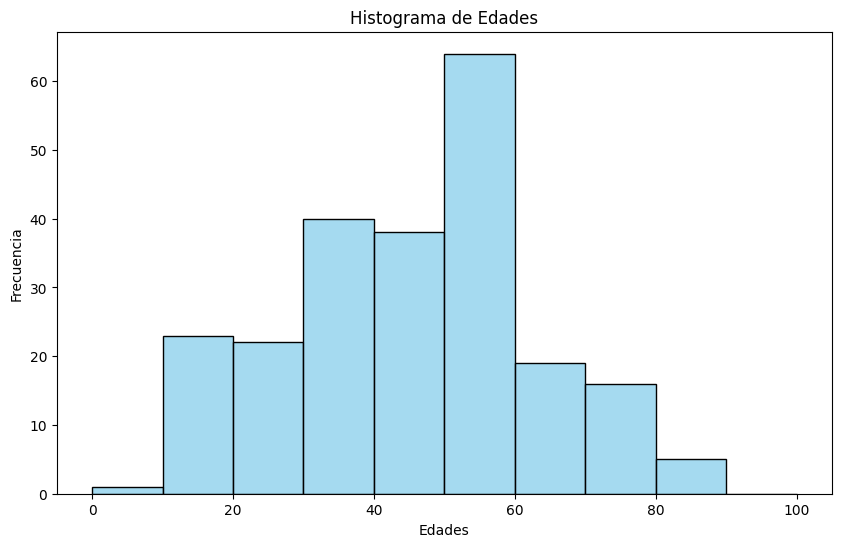

In [14]:
# Gráfico 2: Histograma de edades
plt.figure(figsize=(10, 6))
sns.histplot(df_SM_full['EDAD'], bins=bins, kde=False, color='skyblue')
plt.title('Histograma de Edades')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.savefig('views/viz_edades.jpg', dpi=300)
plt.show()

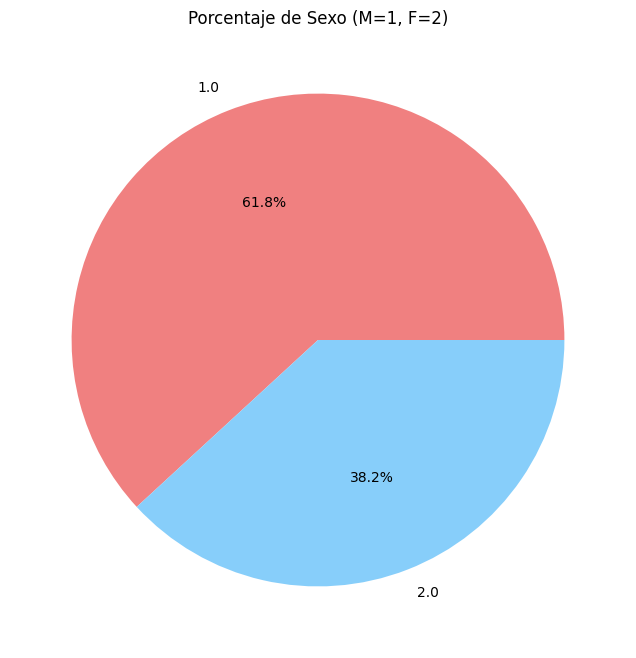

In [15]:
# Gráfico 3: Pie chart de porcentaje de sexo
plt.figure(figsize=(8, 8))
plt.pie(tabla_sexo, labels=tabla_sexo.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Porcentaje de Sexo (M=1, F=2)')
plt.savefig('views/viz_sexo.jpg', dpi=300)
plt.show()

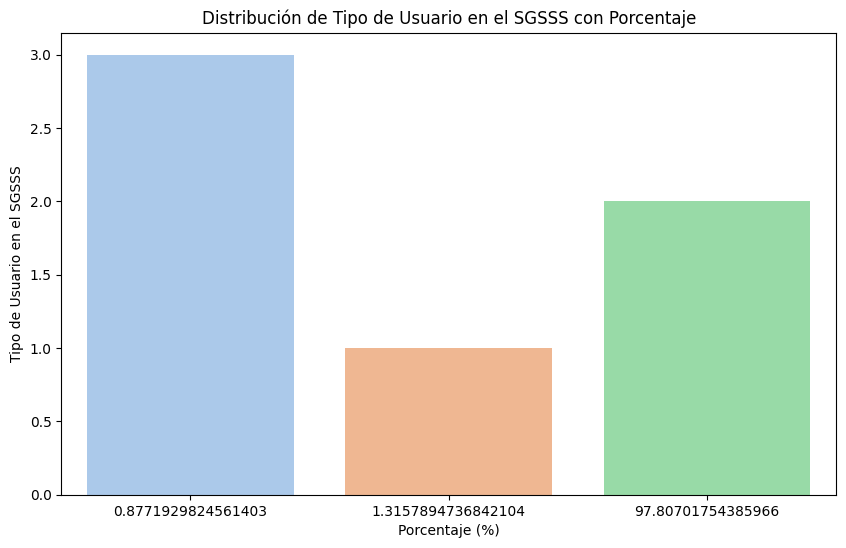

In [16]:
# Gráfico 4: Barplot de porcentaje de 'TIPO DE USUARIO EN EL SGSSS'
plt.figure(figsize=(10, 6))
sns.barplot(x=tabla_tipo_usuario.values, y=tabla_tipo_usuario.index, palette='pastel')
plt.title('Distribución de Tipo de Usuario en el SGSSS con Porcentaje')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Tipo de Usuario en el SGSSS')
plt.savefig('views/viz_tipo_usuario.jpg', dpi=300)
plt.show()

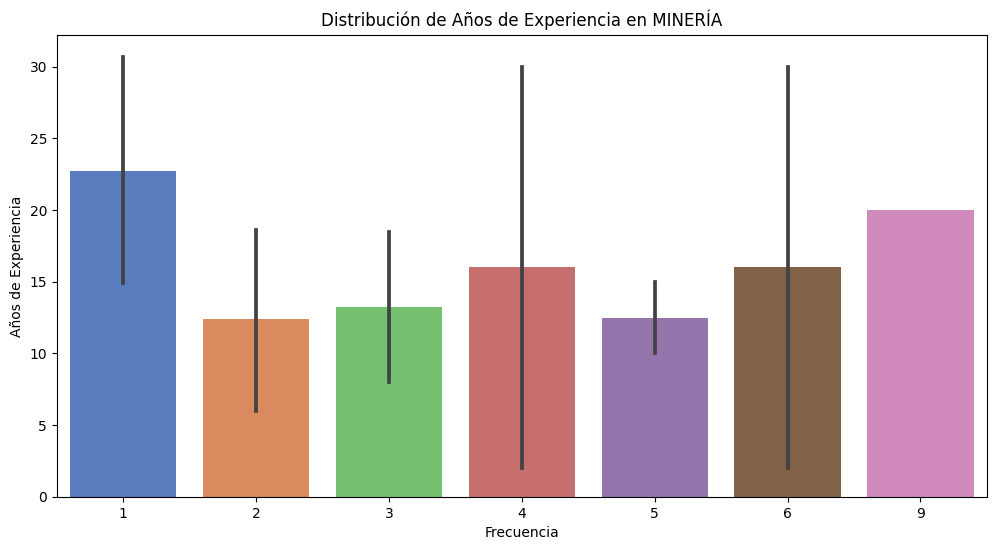

In [17]:
# Gráfico 5: Barplot de años de experiencia en 'MINERÍA'
plt.figure(figsize=(12, 6))
sns.barplot(x=tabla_anios_mineria.values, y=tabla_anios_mineria.index, palette='muted')
plt.title('Distribución de Años de Experiencia en MINERÍA')
plt.xlabel('Frecuencia')
plt.ylabel('Años de Experiencia')
plt.savefig('views/viz_anios_mineria.jpg', dpi=300)
plt.show()

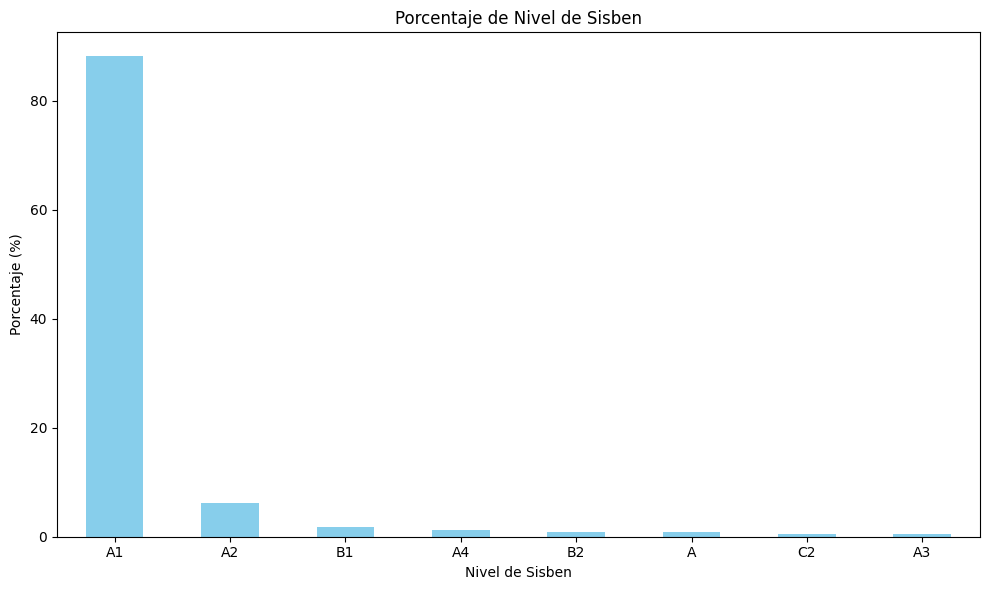

In [18]:
# Visualización: Gráfica de barras para la tabla de porcentajes de nivel de Sisben
plt.figure(figsize=(10, 6))
tabla_sisben.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de Nivel de Sisben')
plt.xlabel('Nivel de Sisben')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=0)
plt.tight_layout()

# Guardar la visualización en un archivo JPG
plt.savefig('views/grafica_sisben.jpg')

# Mostrar la gráfica
plt.show()